# Data Scientist Challenge - LATAM Airlines

## Instrucciones

En Advanced Analytics valoramos muchísimo el trabajo en equipo y la constante interacción entre los distintos roles que trabajan en un producto basado en datos, como el Data Scientist, Machine Learning Engineering, Data Engineer, entre otros. Es por este motivo que una habilidad esencial que buscamos a la hora de buscar nuevos integrantes es el manejo adecuado de git. Este desafío deberá ser entregado en la plataforma de git que más te acomode y que sea pública para que la podamos revisar. Lo que buscamos con esto es poder entender de mejor manera el desarrollo que generaste con tu código, cómo lo fuiste mejorando en el tiempo y si tienes proyectos propios en este repositorio nos servirán para conocer mejor tu experiencia en base a tu propio
portafolio.

Instrucciones Git:
1) Crear un repositorio en la plataforma de git que más te acomode y que sea pública
2) Haber trabajado con una rama principal y otra de desarrollo. Opcional, ocupar alguna práctica de desarrollo de GitFlow.
Instrucciones del desafío:
1) Debes enviar el link al repositorio al mail del que fuiste contactado con asunto Challenge Data Scientist - [Nombre][Apellido], ejemplo Challenge Data Scientist - Pedro Pica Piedra.
2) Se aceptará los cambios en el repositorio hasta la fecha y hora que se indique en el mail.
3) En la siguiente carpeta de Google Drive encontrarás las instrucciones del desafío y el archivo `dataset_SCL.csv` que utilizarás para desarrollarlo.
4) El repositorio debe tener un jupyter notebook llamado solution.ipynb utilizando python 3. No serán revisados otros
lenguajes como R o similar.
5) En solution.ipynb deben estar resueltas las respuestas a todas las preguntas del desafío
6) Dentro del repositorio deben estar todos los archivos necesarios para que los evaluadores puedan clonar y luego correr tu
notebook sin problemas
7) Una copia de tu CV (curriculum vitae) en formato .pdf en el repositorio



## Problema

El problema consiste en predecir la probabilidad de atraso de los vuelos que aterrizan o despegan del aeropuerto de Santiago de
Chile (SCL). Para eso les entregamos un dataset usando datos públicos y reales donde cada fila corresponde a un vuelo que
aterrizó o despegó de SCL. Para cada vuelo se cuenta con la siguiente información:

Fecha-I : Fecha y hora programada del vuelo.

Vlo-I : Número de vuelo programado.

Ori-I : Código de ciudad de origen programado.

Des-I : Código de ciudad de destino programado.

Emp-I : Código aerolínea de vuelo programado.

Fecha-O : Fecha y hora de operación del vuelo.

Vlo-O : Número de vuelo de operación del vuelo.

Ori-O : Código de ciudad de origen de operación

Des-O : Código de ciudad de destino de operación.

Emp-O : Código aerolínea de vuelo operado.

DIA : Día del mes de operación del vuelo.

MES : Número de mes de operación del vuelo.

AÑO : Año de operación del vuelo.

DIANOM : Día de la semana de operación del vuelo.

TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.

OPERA : Nombre de aerolínea que opera.

SIGLAORI : Nombre ciudad origen.

SIGLADES : Nombre ciudad destino.

### Desafío
1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?
2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :
○ temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
○ dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
○ atraso_15 : 1 si dif_min > 15, 0 si no.
○ periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
Fecha-I .
3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo?
¿Qué variables esperarías que más influyeran en predecir atrasos?
4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo.
Siéntete libre de generar variables adicionales y/o complementar con variables externas.
5. Evalúa tu modelo. ¿Qué performance tiene? ¿Qué métricas usaste para evaluar esa performance y por qué? ¿Por qué
elegiste ese algoritmo en particular? ¿Qué variables son las que más influyen en la predicción? ¿Cómo podrías mejorar la
performance?
Aspectos a considerar
Orden y claridad al momento de plantear un análisis, idea, código, etc.
Creatividad para resolver el desafío.
Código versionado en Git.
No vamos a revisar excel, macros, códigos en R.
No vamos a revisar desafíos que no lleguen en la fecha indicada
Ante cualquier duda, deja explícitos tus supuestos
No vivimos en tu cabeza, trata de expresarte lo mejor posible para explicar tus decisiones y respuestas

## Paso 1: Lectura

In [5]:
# importamos librerías importantes para la tarea 
import pandas as pd
import os

In [6]:
# leemos la base cruda con pandas
raw = pd.read_csv('dataset_SCL.csv')

In [7]:
# nuestra lectura de datos es un dataframe?
isinstance(raw, pd.DataFrame)

True

In [8]:
# Sí lo es, pues lo leímos read_csv de pandas que la transforma en dataframe, luego:
df = raw

## Paso 2: Exploración

In [9]:
# Tenemos 18 variables predictoras X1..X18 para nuestra variable respuesta Y (que, sospecho, debe ser la dif entre Fecha-I y Fecha-O)
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [10]:
# vamos a mirar unos primeros valores del df
df.head(n=100)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2017-01-17 13:35:00,92,SCEL,SAEZ,ACA,2017-01-17 14:23:00,92,SCEL,SAEZ,ACA,17,1,2017,Martes,I,Air Canada,Santiago,Buenos Aires
96,2017-01-18 13:35:00,92,SCEL,SAEZ,ACA,2017-01-18 13:41:00,92,SCEL,SAEZ,ACA,18,1,2017,Miercoles,I,Air Canada,Santiago,Buenos Aires
97,2017-01-19 13:35:00,92,SCEL,SAEZ,ACA,2017-01-19 13:37:00,92,SCEL,SAEZ,ACA,19,1,2017,Jueves,I,Air Canada,Santiago,Buenos Aires
98,2017-01-20 13:35:00,92,SCEL,SAEZ,ACA,2017-01-20 14:03:00,92,SCEL,SAEZ,ACA,20,1,2017,Viernes,I,Air Canada,Santiago,Buenos Aires


In [11]:
# vamos a mirar unos últimos valores del df
df.tail(n=100)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
68106,2017-12-31 09:05:00,201,SCEL,SCIE,JAT,2017-12-31 08:58:00,201.0,SCEL,SCIE,JAT,31,12,2017,Domingo,N,JetSmart SPA,Santiago,Concepcion
68107,2017-12-04 06:50:00,203,SCEL,SCIE,JAT,2017-12-04 06:49:00,203.0,SCEL,SCIE,JAT,4,12,2017,Lunes,N,JetSmart SPA,Santiago,Concepcion
68108,2017-12-05 07:00:00,203,SCEL,SCIE,JAT,2017-12-05 06:59:00,203.0,SCEL,SCIE,JAT,5,12,2017,Martes,N,JetSmart SPA,Santiago,Concepcion
68109,2017-12-11 06:50:00,203,SCEL,SCIE,JAT,2017-12-11 06:44:00,203.0,SCEL,SCIE,JAT,11,12,2017,Lunes,N,JetSmart SPA,Santiago,Concepcion
68110,2017-12-12 07:00:00,203,SCEL,SCIE,JAT,2017-12-12 07:17:00,203.0,SCEL,SCIE,JAT,12,12,2017,Martes,N,JetSmart SPA,Santiago,Concepcion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


In [12]:
# algunas estadísticas descriptivas
df.describe()
# no nos dice nada pq lo único numérico hasta ahora son fechas

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


<AxesSubplot:xlabel='date'>

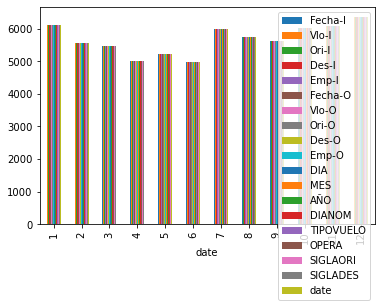

In [24]:
# veamos la distribución de los vuelos
# quiero contar los vuelos Vlo-O, a través de 2017
# luego, agrupados por Operador.

#df.value_counts(sort=False)
#pd.crosstab(index=df['AÑO','MES'], columns='count') 
df["date"] = df["Fecha-O"].astype("datetime64")
df.groupby(df["date"].dt.month).count().plot(kind="bar")




In [23]:
df.MES.value_counts()

12    6356
1     6108
11    6080
10    6032
7     5992
8     5744
9     5610
2     5561
3     5482
5     5240
4     5020
6     4981
Name: MES, dtype: int64

## Paso 3: Pre-procesamiento de Valores faltantes (Missings)

In [12]:
# importamos el módulo ML necesario
from sklearn import preprocessing

In [13]:
df.isna().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

Tenemos suerte, sólo la columna Vlo-O tiene un espacio en blanco que presumiblemente sería un número: 200.

Supuesto: Dado que Vlo-I es también 200. Podemos quitar la linea completa o bien extrapolarlo. Es razonable llenar el dato faltante.


### Pregunta 1: ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?


Mirando la distribución de la cantidad de vuelos por fecha tenemos:

En una 1era mirada tenemos: 

Una ventana temporal de un año (2017) de datos de vuelos de distintos operadores.
Fecha-I y Fecha-O tienen formato "m/d/aaaa hh:mm"
I: Programado, lo planeado.
O: Operación, lo que realmente ocurrio.

Llama la atención que falta un dato en el registro posición 6070, que está en blanco. Pero bajo el supuesto de que, salvo 120 casos, Vlo-I = Vlo-O, lo llenamos con el número 200.

Me parece que habría que definir nuevas caracteristicas según lo solicitado, porque queremos modelar la diferencia entre las Fecha-I y Fecha-O, y en qué unidades medirlo. Definir también qué es un atraso. Además, según la distribución de vuelos en el año, podriamos decir algo sobre la temporada pues en verano (del hemisferio sur) hay una más vuelos que en invierno, hace sentido.

En el paso 4 vamos a definir lo que necesitemos.

## Paso 4: Definimos nuevas características

Definamos nuevas características (synthetic_features):

temporada_alta: 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.

dif_min: diferencia en minutos entre Fecha-O y Fecha-I .

atraso_15: 1 si dif_min > 15, 0 si no. Esto nos define si es un atraso o no?, luego mi var respuesta es dummy. Logistic?

periodo_dia: mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I.

